In [1]:
import json
import numpy as np
import os
from glob import glob
from pprint import pprint
from pathlib import Path, PosixPath
import cv2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def dump_json(path, data):
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    with open(path, 'w') as f:
        json.dump(data, f)
#AFLW
# "roll","pitch","yaw",
def load_text(path):
    with open(path) as f:
        return [l.replace("\n", "") for l in f.readlines()]

In [3]:
path = "/aidata/anders/objects/landmarks/demo_test/annos/BDD_correct_test.json"
annos = load_json(path)
img_root = "/aidata/anders/objects/landmarks/demo_test/crop_imgs"
tmp_objs = []
tmp_mask = []
for frame in annos["frame_list"]:
    name = frame["name"]
    img_path = os.path.join(img_root, name)
    for lb in frame["labels"]:
        attr = lb["attributes"]
        tmp_objs.append(attr["difficulty"])
        tmp_mask.append(attr["mask"])

        
tmp_objs = np.asarray(tmp_objs).astype(np.float32)
tmp_mask = np.asarray(tmp_mask).astype(np.float32)

In [4]:
num_diffs = np.sum(tmp_objs)
print("# difficulties %i"% num_diffs)
num_masks = np.sum(tmp_mask)
print("# mask %i"% num_masks)
diff_mask = tmp_objs*tmp_mask
num_diffs_masks = np.sum(diff_mask)
print("# both difficult and with mask %i"% num_diffs_masks)


# difficulties 167
# mask 341
# both difficult and with mask 110


In [5]:
easy = np.sum(~tmp_objs.astype(bool))
print("# Easy %i"% easy)
num_no_masks = np.sum(~tmp_mask.astype(bool))
print("# without mask %i"% num_no_masks)
easy_no_mask = (~tmp_objs.astype(bool))* (~tmp_mask.astype(bool))
num_easy_no_mask = np.sum(easy_no_mask)
print("# both Easy and without mask %i"% num_easy_no_mask)


# Easy 340
# without mask 166
# both Easy and without mask 109


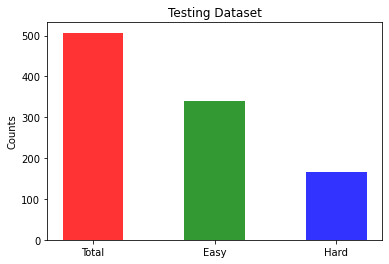

In [14]:
import numpy as np
import matplotlib.pyplot as plt
case = ['Total', 'Easy', 'Hard']
cnts = [507, 340, 167]
x = np.arange(len(case))
plt.bar(x, cnts, color=['red', 'green', 'blue', 'yellow'], alpha = 0.8, width = 0.5)
plt.xticks(x, case)
plt.ylabel('Counts')
plt.title('Testing Dataset')
plt.show()

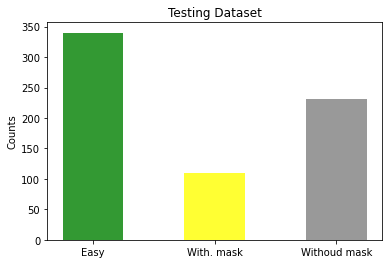

In [16]:
case = ['Easy', 'With. mask', 'Withoud mask']
cnts = [340, 109, 231]
x = np.arange(len(case))
plt.bar(x, cnts, color=['green', 'yellow', 'gray'], alpha = 0.8, width = 0.5)
plt.xticks(x, case)
plt.ylabel('Counts')
plt.title('Testing Dataset')
plt.show()